In [178]:
import pandas as pd
import numpy as np

### Открываем файл экселя


In [179]:
data = pd.read_excel(r'C:\Users\mpapa\MACHINELEARNING\seminar1\data\Вариант 2.xlsx', header = 2)

### Отображаем первые 5 элементов

In [180]:
data.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,124.0,11,Ж,341.0,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
1,2.0,128.0,11,Ж,345.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
2,3.0,132.0,11,Ж,340.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
3,4.0,134.0,11,Ж,339.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
4,5.0,136.0,11,Ж,348.0,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0


### Перебрасываем данные в массив нумпи

In [181]:
np_data = data.to_numpy()[:-1]

In [182]:
np_data

array([[1.0, 124.0, 11, ..., 1.0, 5.0, 27.0],
       [2.0, 128.0, 11, ..., 1.0, 5.0, 27.0],
       [3.0, 132.0, 11, ..., 1.0, 5.0, 27.0],
       ...,
       [2354.0, 136.0, 11, ..., 27.0, 96.0, 27.0],
       [2355.0, 136.0, 11, ..., 27.0, 96.0, 27.0],
       [2356.0, 136.0, 11, ..., 27.0, 96.0, 27.0]], dtype=object)

### Показываем кол-во измерений, размер измерений, элементов

In [183]:
print("Кол-во измерений: ", np_data.ndim)

Кол-во измерений:  2


In [184]:
print("Размер измерений: ", np_data.shape)

Размер измерений:  (2356, 11)


In [185]:
print("Количество элементов: ", np_data.size)

Количество элементов:  25916


### Показываем среднее, медиану, минимум, максимум

In [186]:
mean_points = np.mean(np_data[:,9])

In [187]:
mean_points

49.25509337860781

In [188]:
median = np.median(np_data[:,9])

In [189]:
median

50.0

In [190]:
minimum = np.min(np_data[:,9])

In [191]:
minimum

5.0

In [192]:
maximum = np.max(np_data[:,9])

In [193]:
maximum

96.0

### Показываем процент тех, чьи баллы = 27 и больше 

In [194]:
a = np_data[np_data[:,9] >= 27]

In [195]:
a.shape[0]/np_data.shape[0] *100

90.78947368421053

### График показывает отношение кол-ва баллов >= 27 на остальное кол-во (<27)


In [202]:
import matplotlib.pyplot as plt

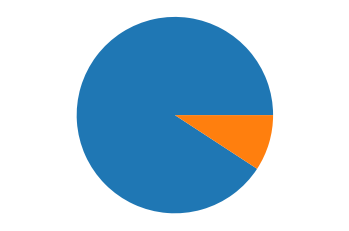

In [201]:
x = a.shape[0]/np_data.shape[0]*100
sizes = [x, 100-x]
figl, ax1 = plt.subplots()
ax1.pie(sizes)
ax1.axis('equal')
plt.show()

### График показывает по баллам (если < 27, то не сдал, >= 27, то сдал)

(-1.1084260229057996,
 1.1506045828607878,
 -1.1068718550211485,
 1.1073794658767886)

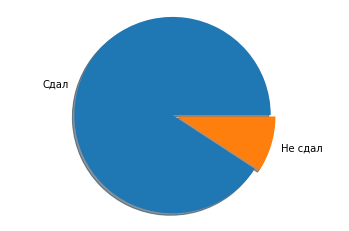

In [205]:
labels = "Сдал", "Не сдал"
explode = (0, 0.05)
figl, axl = plt.subplots()
axl.pie(sizes, explode = explode, labels = labels, shadow = True)
axl.axis('equal')

### Показываем гистограмму баллов

(array([ 55., 162., 154., 496., 520., 193., 326., 366.,  71.,  13.]),
 array([5.0, 14.1, 23.2, 32.3, 41.4, 50.5, 59.599999999999994,
        68.69999999999999, 77.8, 86.89999999999999, 96.0], dtype=object),
 <BarContainer object of 10 artists>)

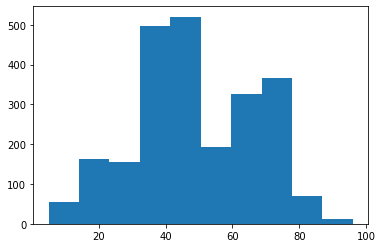

In [24]:
plt.hist(np_data[:,9])

### График оценки плотности баллов

In [25]:
from sklearn.neighbors import KernelDensity
import scipy

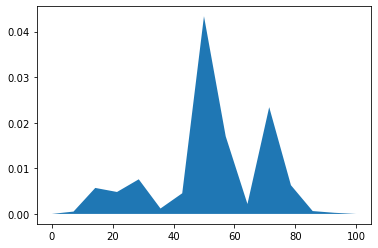

In [26]:
kde = KernelDensity(kernel = "gaussian", bandwidth=1).fit(np_data[:,9].reshape(-1,1))
x = np.linspace(0,100,15)[:, np.newaxis]
a = kde.score_samples(x)
plt.fill(x, np.exp(a))

In [27]:
a = np_data[np_data[:,9] < 27].shape[0]

### Показываем процент неудовлетворительных, удовлетворительных оценок, оценок хорошо и отлично

In [28]:
b = np_data[(27 <= np_data[:,9]) & (np_data[:,9] < 50)].shape[0]
c = np_data[(50 <= np_data[:,9]) & (np_data[:,9] < 75)].shape[0]
d = np_data[np_data[:,9] >= 75].shape[0]
total = np_data.shape[0]
print("Процент оценок неудовлетворительно: ", a/total*100)

Процент оценок неудовлетворительно:  9.210526315789473


In [29]:
print("Процент оценок удовлетворительно: ", b/total*100)

Процент оценок удовлетворительно:  38.79456706281834


In [30]:
print("Процент оценок хорошо", c/total*100)

Процент оценок хорошо 46.26485568760611


In [31]:
print("Процент оценок отлично: ", d/total*100)

Процент оценок отлично:  5.730050933786078


### Количество мужчин

In [32]:
M = np_data[np_data[:,3] == "М"].shape[0]


In [33]:
M

1111

### Количество женщин

In [34]:
G = np_data[np_data[:,3] == "Ж"].shape[0]
G

1245

### График отношения кол-ва мужчин на женщин

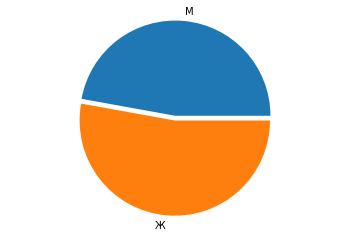

In [35]:
sizes = (M,G)
labels = "М", "Ж"
explode = (0,0.05)
fig1, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels)
ax.axis("equal")
plt.show()

### Кол-во школ 

In [36]:
np.unique(np_data[:,1]).shape[0]

17

### Сами школы

In [37]:
set(np_data[:,1])

{121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0}

In [38]:
print("Кол-во школ: ", np.unique(np_data[:,1]).shape[0])

Кол-во школ:  17


# Домашнее задание
Вывести количество выполненных заданий типа B для каждого ученика.
<br>
Вывести среднее число выполненных заданий типа B
<br>
Вывести средний балл для юношей и для девушек
<br>
Добавить строковые комментарии (в виде строковых ячеек для всех функций)

Вывести количество выполненных заданий типа B для каждого ученика

In [171]:
task_b = np.array([x[2] for x in np_data[:,5]]) #генератор списка для нахождения задания типа B для каждого ученика
task_b.shape #размер массива - кол-во заданий типа B для всех учеников

(2356,)

### Получаем информацию о каждом ученике, правильно ли он решил задание типа B

In [172]:
task_b 

array(['-', '-', '-', ..., '+', '+', '+'], dtype='<U1')

### Ученики, которые правильно решили задание типа B

In [128]:
student_right_task_b = task_b[task_b[:] == "+"] #проверяем, что содержимое массива имеет +, то есть, выполнено задание типа B
student_right_task_b.shape #кол-во выполненных заданий

(2186,)

In [129]:
student_right_task_b 

array(['+', '+', '+', ..., '+', '+', '+'], dtype='<U1')

### Ученики, которые неправильно решили задание типа B

In [130]:
student_false_task_b = task_b[task_b[:] == "-"] #проверяем, что содержимое массива имеет -, то есть, не выполнено задание типа B
student_false_task_b.shape #кол-во невыполненных заданий

(170,)

In [131]:
student_false_task_b 

array(['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-'], dtype='<U1')

### Вывести среднее число выполненных заданий типа B

In [132]:
sr_zhach_student_right_task_b = (student_right_task_b.shape[0]/task_b.shape[0])*100 #среднее число в (%) для выполненных заданий типа B
sr_zhach_student_right_task_b

92.78438030560272

### Вывести средний балл для юношей и для девушек 

In [143]:
data = data[:-1] #убираем последнюю строку - так как она NAN

In [144]:
data

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,124.0,11,Ж,341.0,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
1,2.0,128.0,11,Ж,345.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
2,3.0,132.0,11,Ж,340.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
3,4.0,134.0,11,Ж,339.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
4,5.0,136.0,11,Ж,348.0,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
2351,2352.0,136.0,11,М,337.0,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25.0,92.0,27.0
2352,2353.0,136.0,11,М,341.0,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25.0,92.0,27.0
2353,2354.0,136.0,11,М,341.0,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27.0,96.0,27.0
2354,2355.0,136.0,11,М,343.0,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27.0,96.0,27.0


### Вывести средний балл для юношей и для девушек ( менее красивый вывод)

In [168]:
my_grouped_list = data.groupby("Пол").mean() #делаем группировку по полу, и выводим среднее для 6 столбцов.
my_grouped_list

,№,№ школы,Номер варианта,Первичный балл,Балл,Минимальный балл
Пол,,,,,,
Ж,1156.903614,131.793574,341.093976,9.975904,48.719679,27.0
М,1202.701170,132.243024,335.113411,10.289829,49.855086,27.0


In [169]:
my_grouped_list['Балл'] #обращаемся к среднему значению столбца Балл

Пол
Ж    48.719679
М    49.855086
Name: Балл, dtype: float64

### Более красивый вывод

In [170]:
data[["Балл", "Пол"]].groupby("Пол").mean().sort_values("Балл", ascending = False) # делаем группировку по полу и находим среднее для столбца Балл, а так же сортируем по убыванию столбец Балл

,Балл
Пол,
М,49.855086
Ж,48.719679
